In [ ]:
# image classsification
# object detection
# Image segmentation

In [5]:
import torch
import torchvision
from torch import nn , optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToTensor
from torchvision.datasets import  ImageFolder, MNIST, FashionMNIST, CIFAR10

In [10]:
data_train = MNIST('./data',download=True,train=True,transform=ToTensor())
data_test = MNIST('./data',download=True,train=False,transform=ToTensor())

In [15]:
imf = data_train[0][0]
imf = imf.view(28,28)
imf.shape


torch.Size([28, 28])

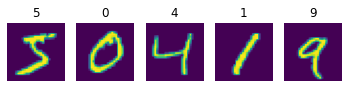

In [18]:
fig, ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

In [22]:
model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

In [23]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): LogSoftmax(dim=None)
)


In [21]:
train_loader = torch.utils.data.DataLoader(data_train,batch_size=64)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=64)

In [31]:
def train_epoch(model,dataloader,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(model.parameters(),lr=lr)
    model.train()
    total_loss,acc,count = 0,0,0
    for features,labels in dataloader:
        optimizer.zero_grad()
        out = model(features)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
    return total_loss.item()/count, acc.item()/count


In [35]:
for i in range(1):
   train_epoch(model,train_loader)

In [36]:
def validate(net, dataloader,loss_fn=nn.NLLLoss()):
    net.eval()
    count,acc,loss = 0,0,0
    with torch.no_grad():
        for features,labels in dataloader:
            out = net(features)
            loss += loss_fn(out,labels)
            pred = torch.max(out,1)[1]
            acc += (pred==labels).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count

validate(model,test_loader)

(0.00690263671875, 0.8904)

In [38]:
def train(net,train_loader,test_loader,optimizer=None,lr=0.01,epochs=10,loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
        vl,va = validate(net,test_loader,loss_fn=loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
    return res

In [39]:
hist = train(model,train_loader,test_loader,epochs=5)

/home/eric/Desktop/DeepL_projects/Phebian&Me/pytorch_playground/venv/lib/python3.8/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch  0, Train acc=0.919, Val acc=0.889, Train loss=0.005, Val loss=0.007
Epoch  1, Train acc=0.919, Val acc=0.889, Train loss=0.005, Val loss=0.007
Epoch  2, Train acc=0.920, Val acc=0.889, Train loss=0.005, Val loss=0.007
Epoch  3, Train acc=0.920, Val acc=0.888, Train loss=0.005, Val loss=0.007
Epoch  4, Train acc=0.920, Val acc=0.888, Train loss=0.005, Val loss=0.007


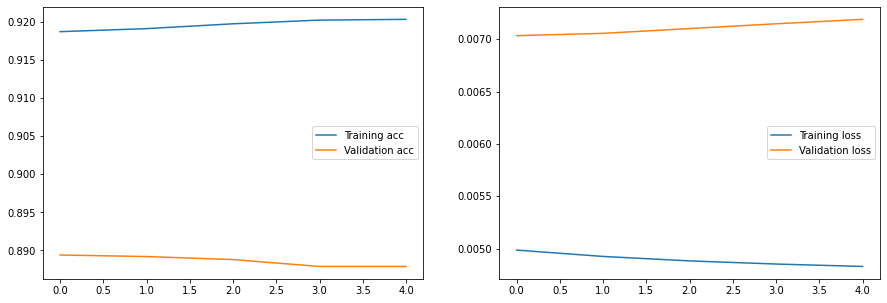

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(hist['train_acc'], label='Training acc')
plt.plot(hist['val_acc'], label='Validation acc')
plt.legend()
plt.subplot(122)
plt.plot(hist['train_loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.legend()